# Student AI Assistant Usage Data Analysis
### Made by - Pratyush Puri
### LinkedIN - [linkedin.com/in/pratyushpuri](https://www.linkedin.com/in/pratyushpuri)
<br><br>
## Data Loading and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import parallel_coordinates

import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
#loading the dataset
df =pd.read_csv('/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv')
df.sample(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
6863,SESSION06864,Undergraduate,Engineering,2024-11-01,6.22,2,Writing,4,Assignment Completed,True,4.8
3147,SESSION03148,Undergraduate,Biology,2025-05-23,28.23,7,Writing,1,Idea Drafted,True,1.0
3797,SESSION03798,Undergraduate,Engineering,2024-10-31,30.86,12,Writing,2,Assignment Completed,True,1.2
2485,SESSION02486,Undergraduate,Math,2025-01-15,19.61,9,Homework Help,3,Confused,False,3.5
4693,SESSION04694,Undergraduate,Math,2025-06-19,17.18,7,Coding,4,Assignment Completed,False,4.1


In [3]:
#checking the shape of the data
df.shape

(10000, 11)

In [4]:
# identifying the columns present in the dataset
df.columns

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

In [5]:
df.describe(include='all')

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000,10000,10000.000000
unique,10000,3,7,366,NaN,NaN,6,NaN,4,2,NaN
top,SESSION00001,Undergraduate,Biology,2025-04-03,NaN,NaN,Writing,NaN,Assignment Completed,True,NaN
freq,1,5978,1458,41,NaN,NaN,3101,NaN,4768,7064,NaN
mean,NaN,NaN,NaN,NaN,19.846467,5.607500,NaN,3.479500,NaN,NaN,3.417780
std,NaN,NaN,NaN,NaN,13.897302,4.648764,NaN,0.991805,NaN,NaN,1.143331
min,NaN,NaN,NaN,NaN,0.030000,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,9.630000,2.000000,NaN,3.000000,NaN,NaN,2.600000
50%,NaN,NaN,NaN,NaN,16.650000,4.000000,NaN,4.000000,NaN,NaN,3.500000
75%,NaN,NaN,NaN,NaN,26.670000,8.000000,NaN,4.000000,NaN,NaN,4.400000


In [6]:
#info regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


## Data Cleaning
#### Dropping unnecessary columns

In [7]:
df = df.drop(columns=['SessionID'])
df.sample()

,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
4557,High School,Engineering,2025-01-09,35.75,8,Studying,2,Idea Drafted,True,1.6


In [8]:
#checking for duplicates
df.duplicated().sum()

0

#### Checking for Null Values

In [9]:
df.isnull().sum()

StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [10]:
#finding unique value patterns
df.nunique()

StudentLevel             3
Discipline               7
SessionDate            366
SessionLengthMin      4078
TotalPrompts            37
TaskType                 6
AI_AssistanceLevel       5
FinalOutcome             4
UsedAgain                2
SatisfactionRating      41
dtype: int64

### Changing wrong dtypes to right ones

In [11]:
df.dtypes

StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

In [12]:
df['SessionDate']=pd.to_datetime(df['SessionDate'])
df['SessionDate'].dtype

dtype('<M8[ns]')

## Outlier Analysis and Handling
### Outlier Detection

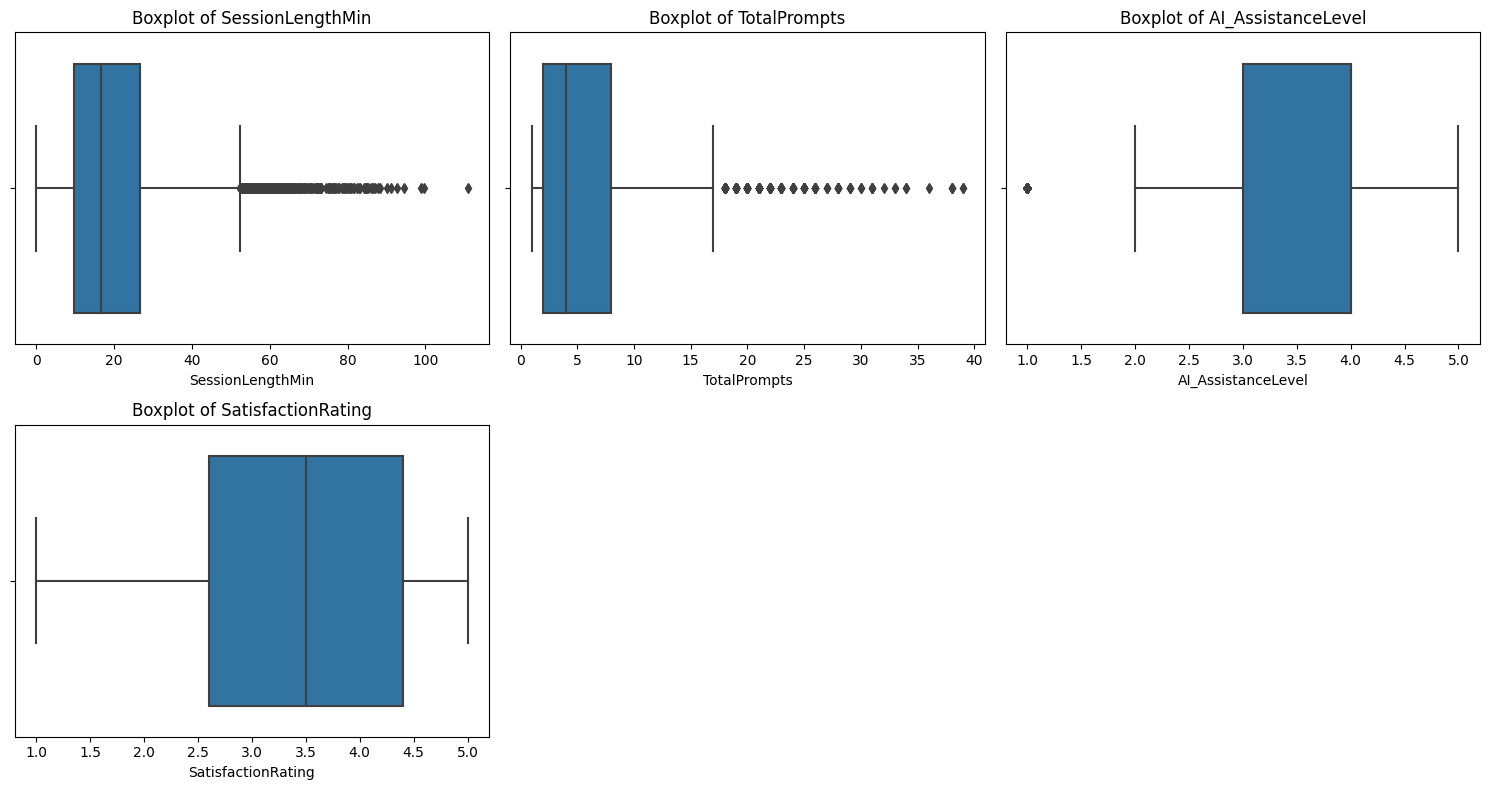

In [13]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier Handling

In [14]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())  

Outliers handled with Winsorization using IQR:
    StudentLevel        Discipline SessionDate  SessionLengthMin  \
0  Undergraduate  Computer Science  2024-11-03             31.20   
1  Undergraduate        Psychology  2024-08-25             13.09   
2  Undergraduate          Business  2025-01-12             19.22   
3  Undergraduate  Computer Science  2025-05-06              3.70   
4  Undergraduate        Psychology  2025-03-18             28.12   

   TotalPrompts  TaskType  AI_AssistanceLevel          FinalOutcome  \
0          11.0  Studying                 2.0  Assignment Completed   
1           6.0  Studying                 3.0  Assignment Completed   
2           5.0    Coding                 3.0  Assignment Completed   
3           1.0    Coding                 3.0  Assignment Completed   
4           9.0   Writing                 3.0  Assignment Completed   

   UsedAgain  SatisfactionRating  
0       True                 1.0  
1       True                 2.0  
2       True

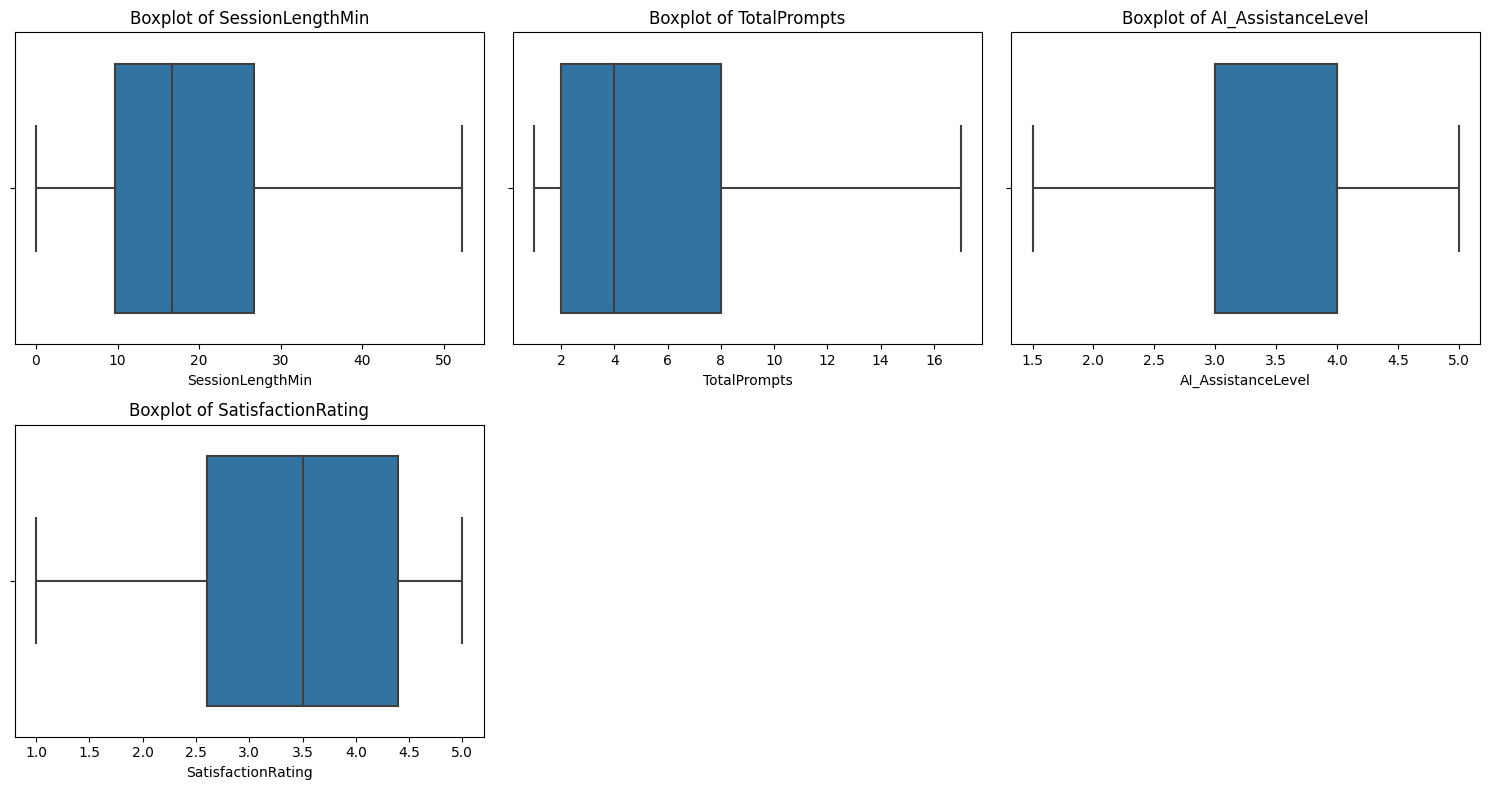

In [15]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### What is the distribution of student levels in AI assistant usage?

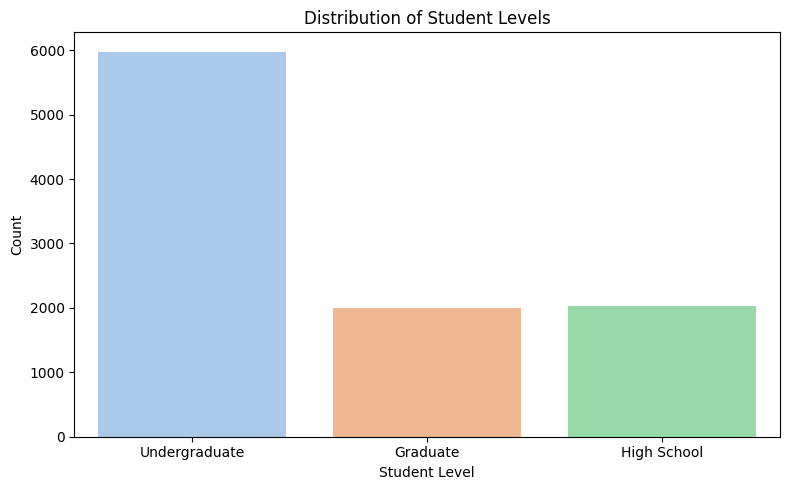

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='StudentLevel', data=df, palette='pastel')
plt.title('Distribution of Student Levels')
plt.xlabel('Student Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insight**: Undergraduate students dominate AI assistant usage with 59.78% of sessions, indicating higher adoption among university students than high school or graduate students.

### Which disciplines use AI assistants most frequently?

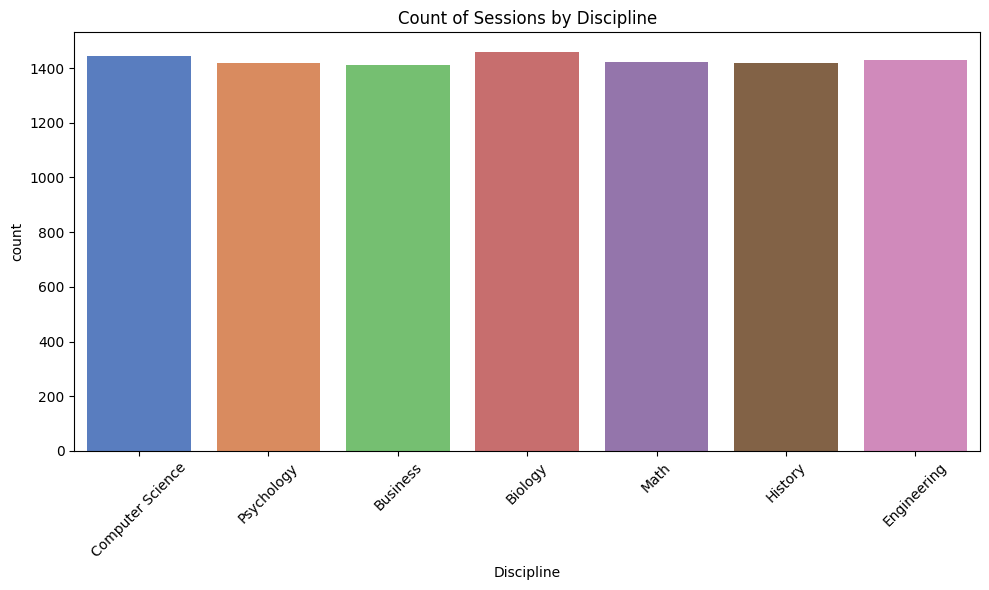

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Discipline', data=df, palette='muted')
plt.title('Count of Sessions by Discipline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Biology leads with 14.58% of sessions, followed by Computer Science at 14.28%, showing relatively balanced usage across all seven academic disciplines.

### How does session length vary across different student levels?

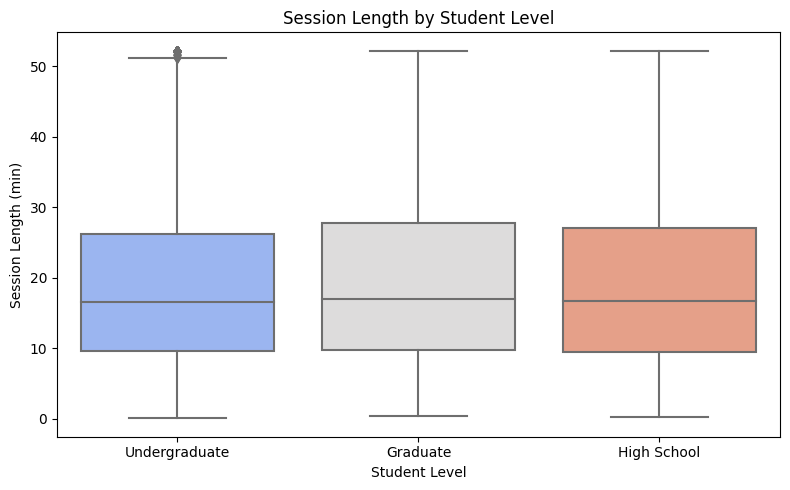

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='StudentLevel', y='SessionLengthMin', data=df, palette='coolwarm')
plt.title('Session Length by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Session Length (min)')
plt.tight_layout()
plt.show()

**Insight**: Graduate students tend to have longer sessions with higher variance, while high school students show more consistent shorter sessions, reflecting different engagement patterns.

### What is the relationship between AI assistance level and task types?

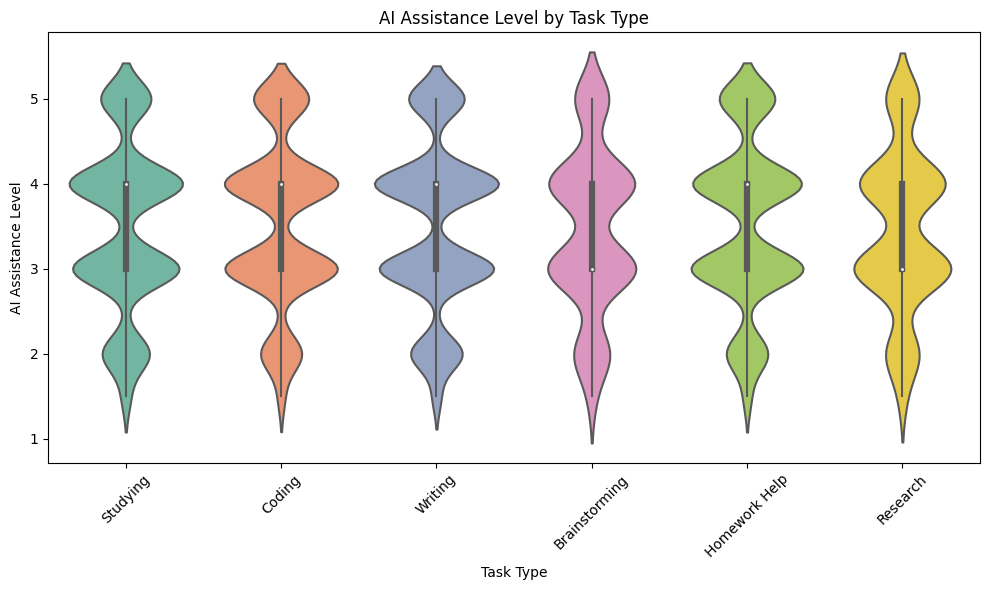

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='TaskType', y='AI_AssistanceLevel', data=df, palette='Set2')
plt.title('AI Assistance Level by Task Type')
plt.xticks(rotation=45)
plt.xlabel('Task Type')
plt.ylabel('AI Assistance Level')
plt.tight_layout()
plt.show()

**Insight**: Writing tasks receive the highest AI assistance levels, while coding and research tasks show more varied assistance patterns across different complexity levels.

### What are the final outcomes of AI assistant sessions?

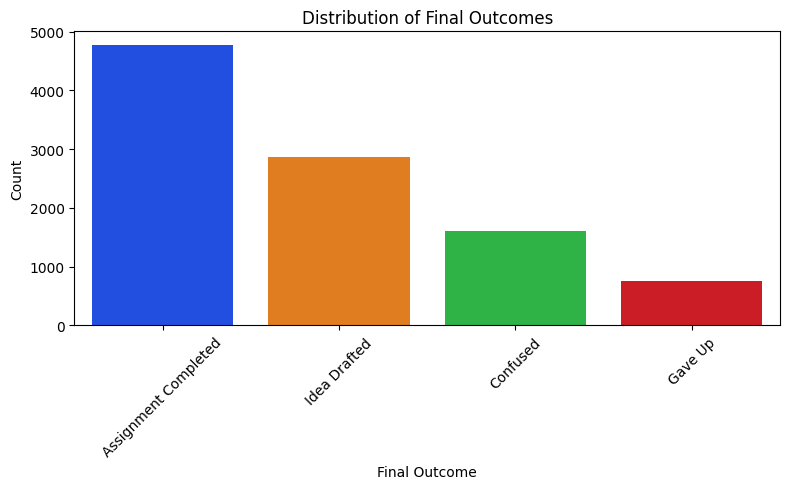

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='FinalOutcome', data=df, palette='bright')
plt.title('Distribution of Final Outcomes')
plt.xlabel('Final Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Nearly 48% of sessions result in assignment completion, with 29% producing idea drafts, demonstrating high effectiveness in academic task completion.

### How many students return to use the AI assistant again?

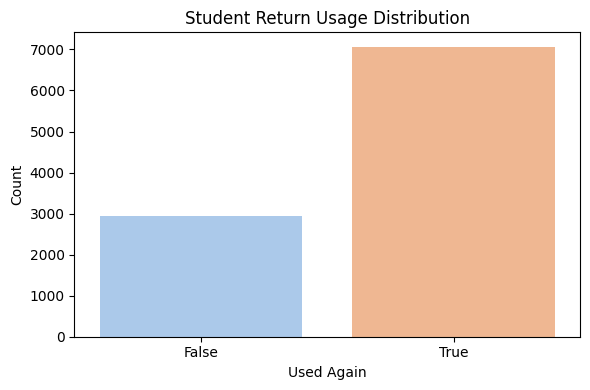

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='UsedAgain', data=df, palette='pastel')
plt.title('Student Return Usage Distribution')
plt.xlabel('Used Again')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insight**: Over 70% of students return to use the AI assistant again, indicating high satisfaction and perceived value in the tool.

### How do satisfaction ratings vary across student levels?

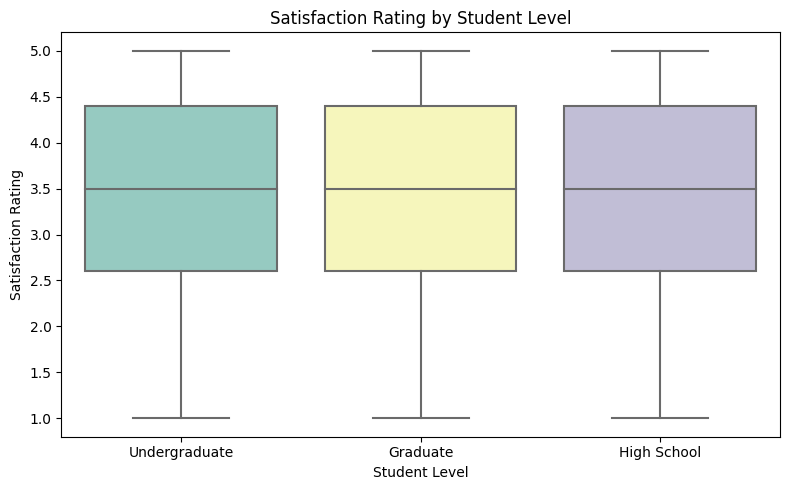

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='StudentLevel', y='SatisfactionRating', data=df, palette='Set3')
plt.title('Satisfaction Rating by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Satisfaction Rating')
plt.tight_layout()
plt.show()

**Insight**: All student levels show similar satisfaction medians around 3.5, with graduate students showing slightly higher variance in their satisfaction ratings.

### What is the average number of prompts per task type?

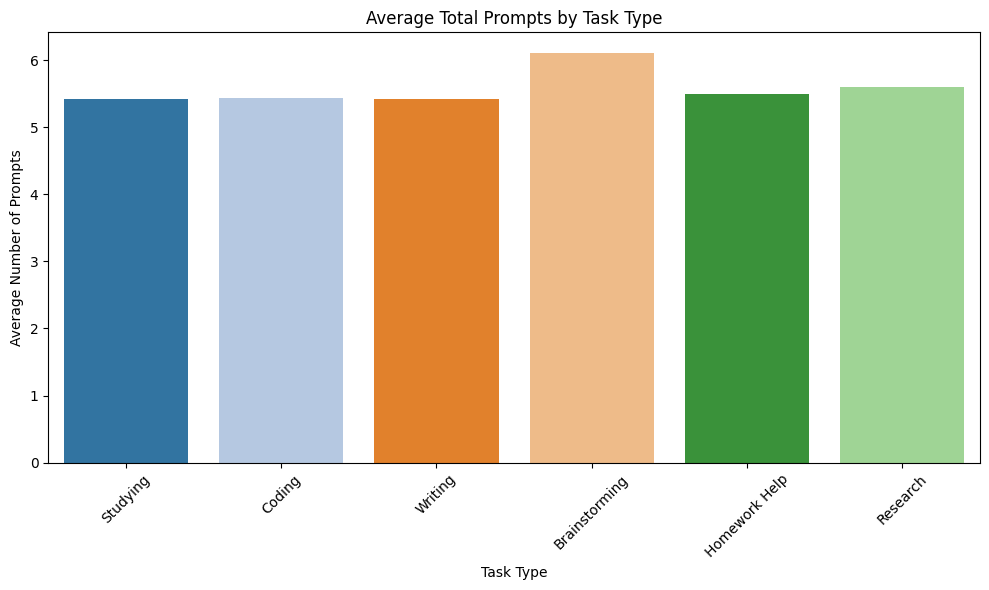

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TaskType', y='TotalPrompts', data=df, ci=None, palette='tab20')
plt.title('Average Total Prompts by Task Type')
plt.xticks(rotation=45)
plt.xlabel('Task Type')
plt.ylabel('Average Number of Prompts')
plt.tight_layout()
plt.show()

**Insight**: Studying tasks require the most prompts on average, while brainstorming tasks need fewer, suggesting different interaction patterns for various academic activities.

### What is the relationship between session length and satisfaction rating?

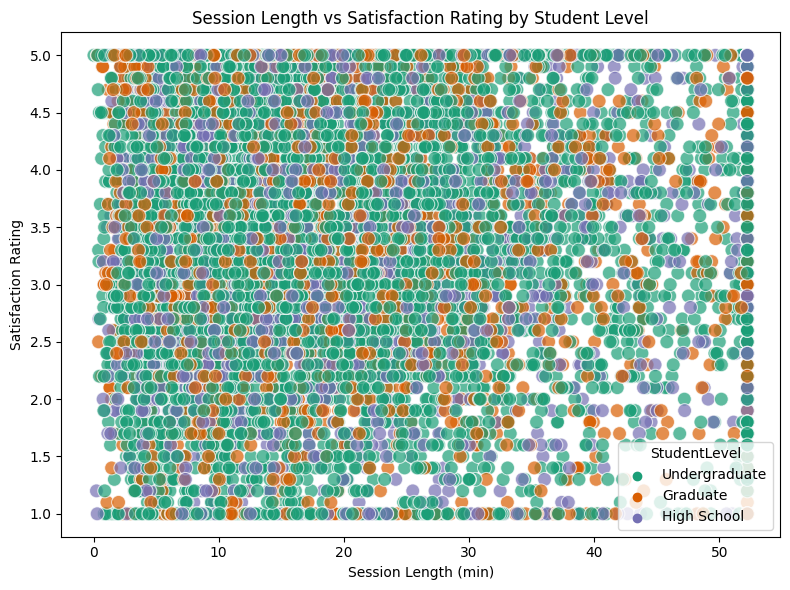

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SessionLengthMin', y='SatisfactionRating', hue='StudentLevel', 
                palette='Dark2', data=df, s=100, alpha=0.7)
plt.title('Session Length vs Satisfaction Rating by Student Level')
plt.xlabel('Session Length (min)')
plt.ylabel('Satisfaction Rating')
plt.tight_layout()
plt.show()

**Insight**: No clear linear relationship exists between session length and satisfaction, suggesting quality of interaction matters more than duration across all levels.

### How do numeric features correlate with each other?

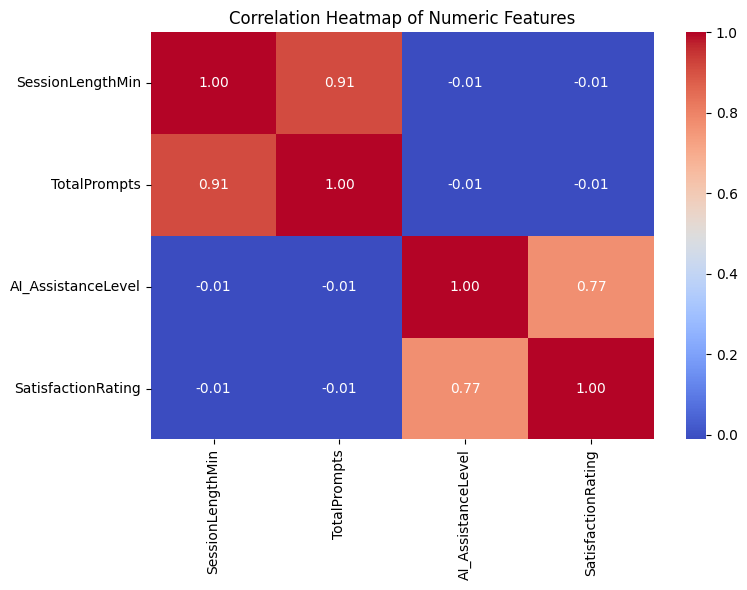

In [25]:
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

**Insight**: Moderate positive correlation exists between AI assistance level and satisfaction rating, while session length shows weak correlations with other variables.

### Some Other Visualizations
#### Task Type Distribution by Student Level

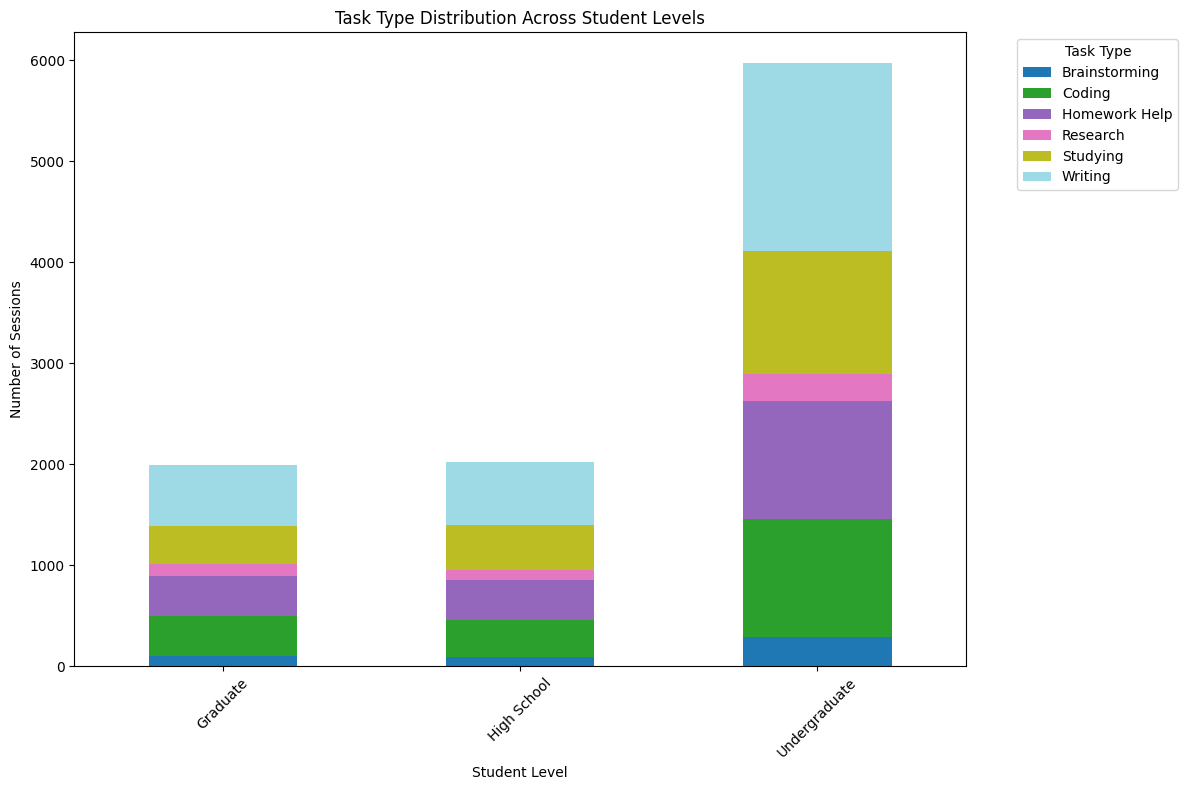

In [26]:
plt.figure(figsize=(12, 8))
task_level_counts = df.groupby(['StudentLevel', 'TaskType']).size().unstack(fill_value=0)
task_level_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Task Type Distribution Across Student Levels')
plt.xlabel('Student Level')
plt.ylabel('Number of Sessions')
plt.legend(title='Task Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Undergraduate students dominate all task types, with writing tasks being most popular across levels, indicating consistent academic needs regardless of educational stage.

#### AI Assistance Level by Final Outcome

<Figure size 1500x1000 with 0 Axes>

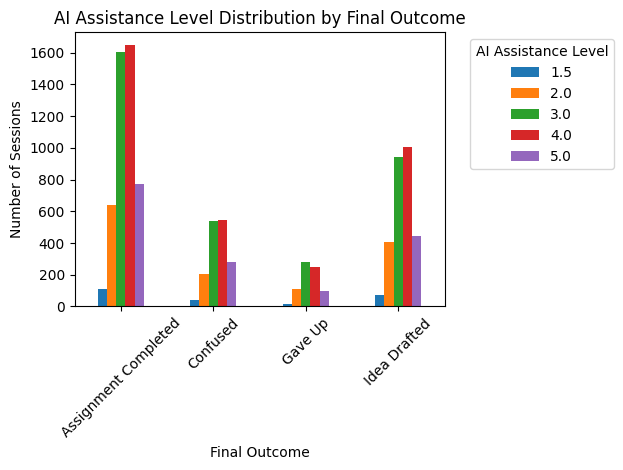

In [27]:
plt.figure(figsize=(15, 10))
outcome_assistance = df.groupby(['FinalOutcome', 'AI_AssistanceLevel']).size().unstack(fill_value=0)
outcome_assistance.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('AI Assistance Level Distribution by Final Outcome')
plt.xlabel('Final Outcome')
plt.ylabel('Number of Sessions')
plt.legend(title='AI Assistance Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Assignment completion shows balanced AI assistance levels, while confusion outcomes correlate with lower assistance levels, suggesting inadequate AI support affects task completion.

### Final Outcome Distribution

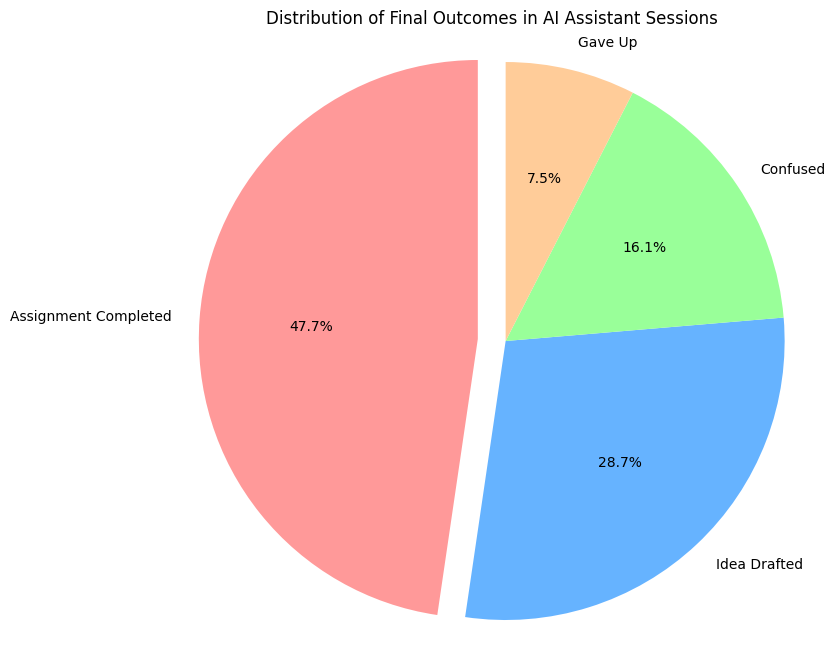

In [28]:
plt.figure(figsize=(8, 8))
outcome_counts = df['FinalOutcome'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(outcome_counts.values, labels=outcome_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.1, 0, 0, 0))
plt.title('Distribution of Final Outcomes in AI Assistant Sessions')
plt.axis('equal')
plt.show()

**Insight**: Nearly 48% of sessions result in assignment completion, demonstrating high AI effectiveness, while only 8% end in giving up completely.

### Session Length Distribution

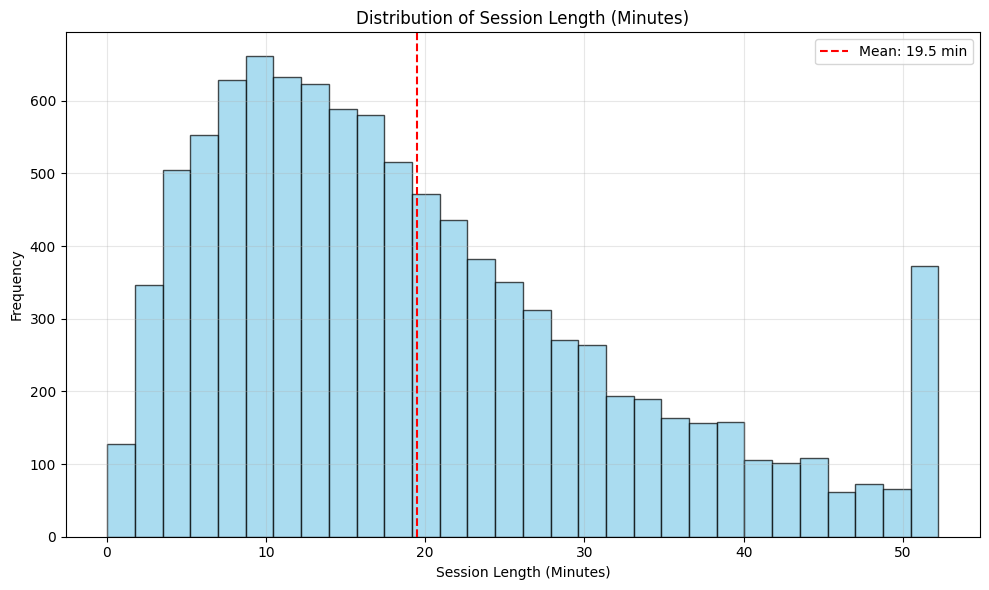

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['SessionLengthMin'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Session Length (Minutes)')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Frequency')
plt.axvline(df['SessionLengthMin'].mean(), color='red', linestyle='--', label=f'Mean: {df["SessionLengthMin"].mean():.1f} min')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Most sessions cluster around 10-30 minutes with a right-skewed distribution, indicating students typically need moderate time for AI assistance interactions.

#### Session Length by Discipline

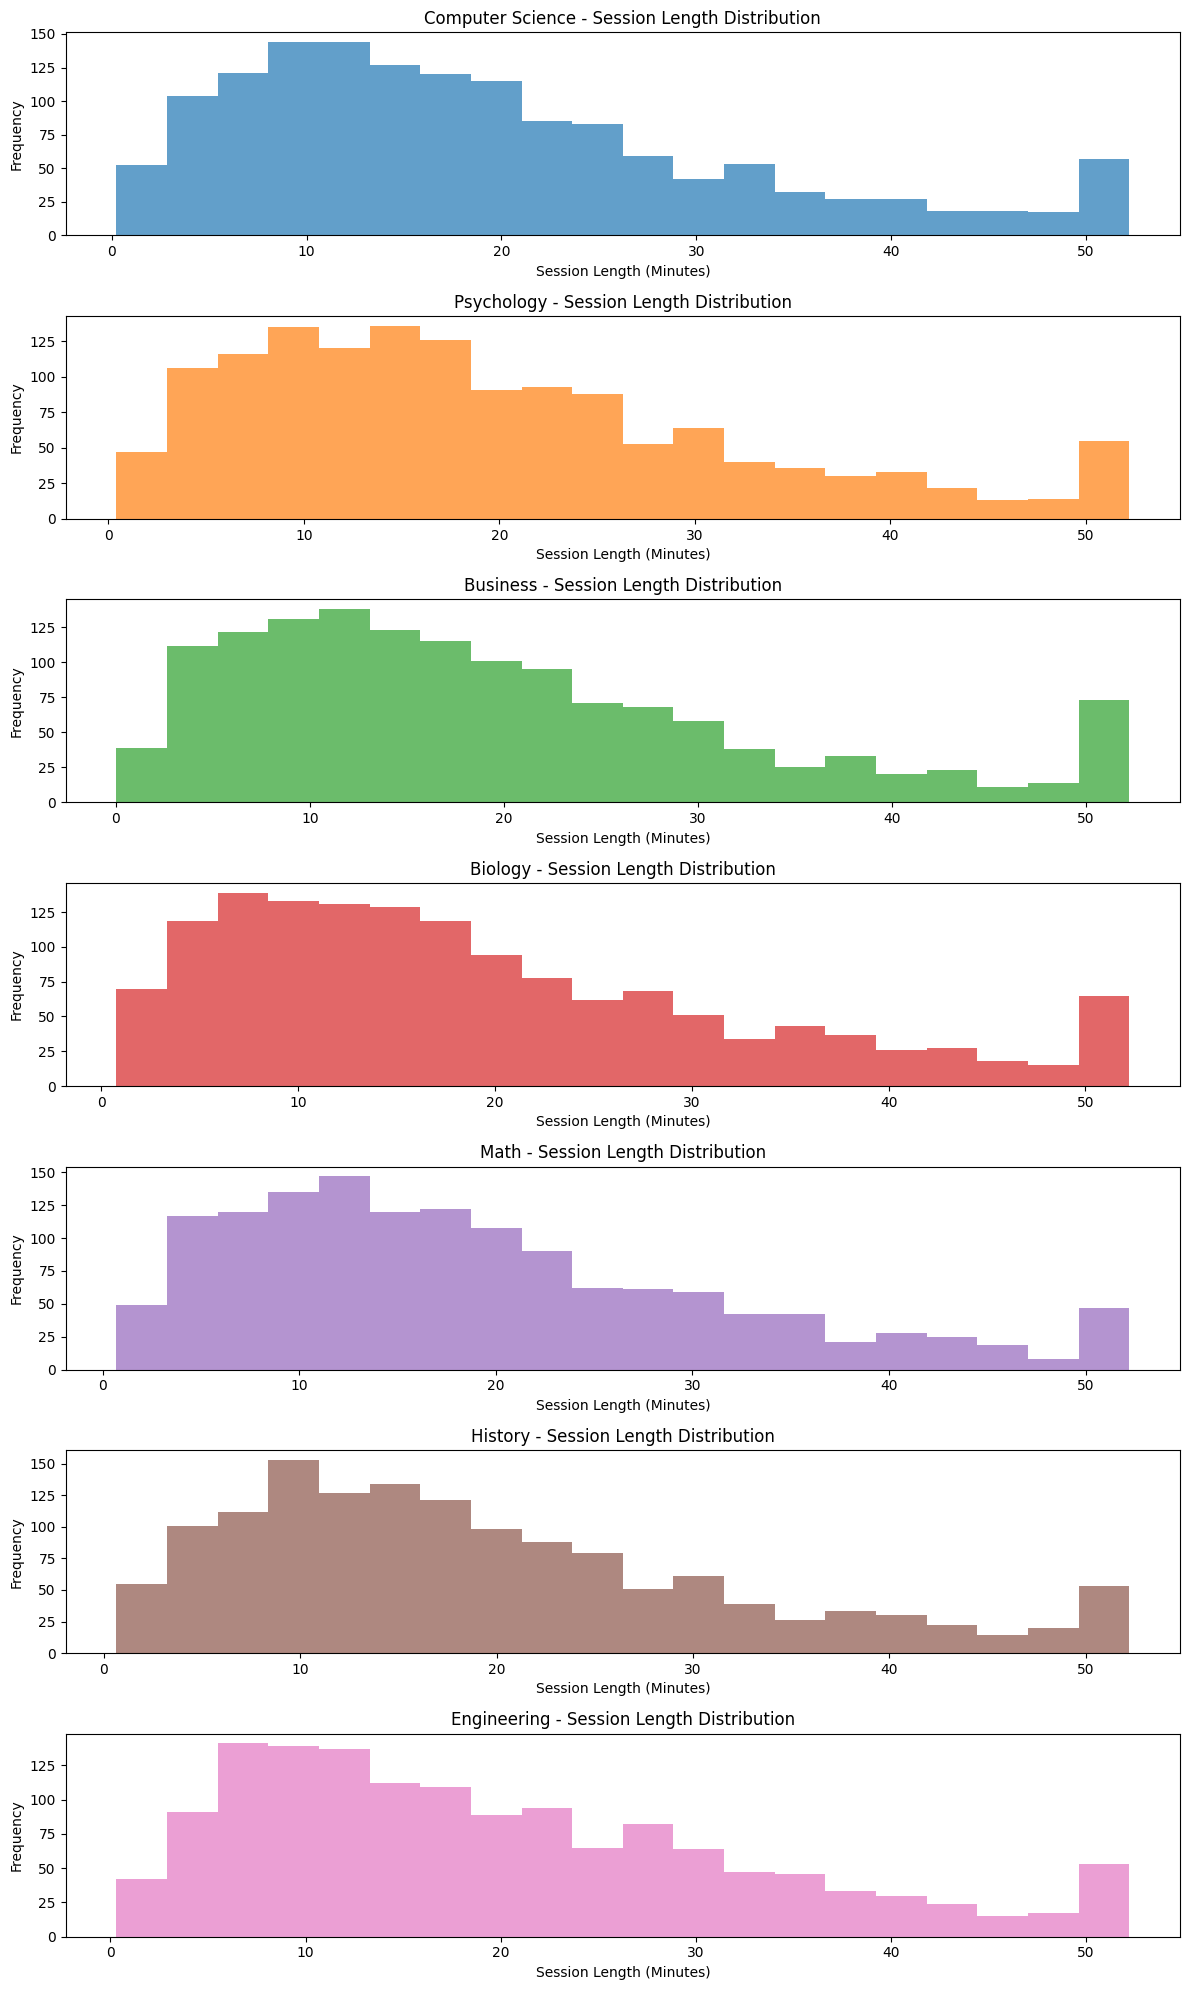

In [30]:
plt.figure(figsize=(12, 20))
disciplines = df['Discipline'].unique()
for i, discipline in enumerate(disciplines):
    discipline_data = df[df['Discipline'] == discipline]['SessionLengthMin']
    plt.subplot(len(disciplines), 1, i+1)
    plt.hist(discipline_data, bins=20, alpha=0.7, color=plt.cm.tab10(i))
    plt.title(f'{discipline} - Session Length Distribution')
    plt.xlabel('Session Length (Minutes)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insight**: Biology and Computer Science show longer session tails, suggesting complex problem-solving needs, while Psychology sessions remain consistently shorter in duration.

#### Hierarchical Task Analysis

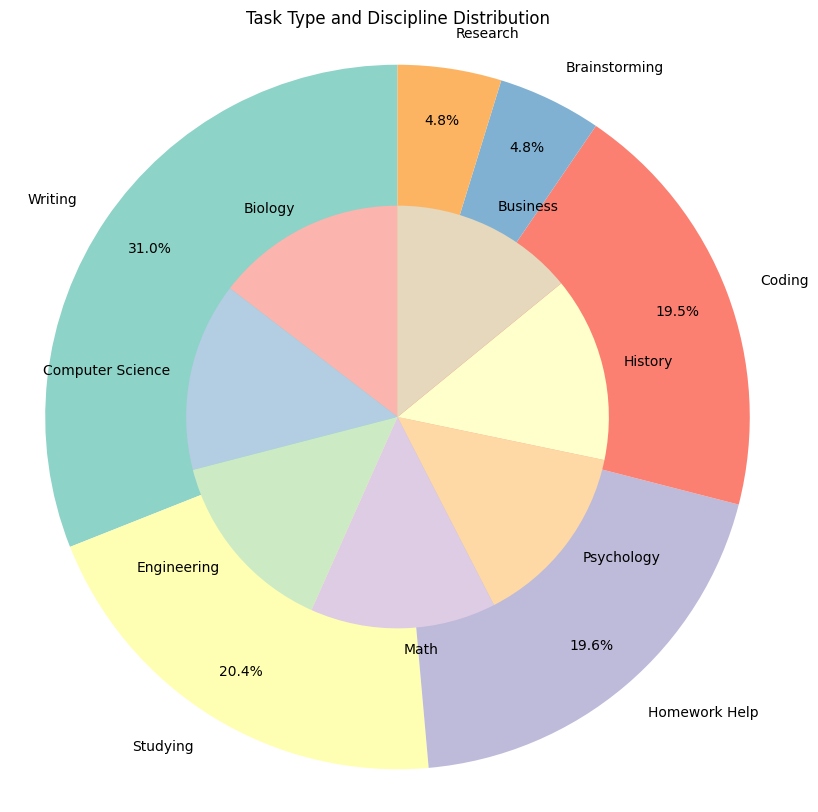

In [31]:
# Creating a hierarchical structure for visualization
task_discipline = df.groupby(['TaskType', 'Discipline']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(10, 10))

# Create nested pie charts
task_counts = df['TaskType'].value_counts()
colors1 = plt.cm.Set3(range(len(task_counts)))

# Outer ring
wedges, texts, autotexts = ax.pie(task_counts.values, labels=task_counts.index, 
                                 autopct='%1.1f%%', colors=colors1, radius=1.0, 
                                 pctdistance=0.85, startangle=90)

# Inner ring
discipline_counts = df['Discipline'].value_counts()
colors2 = plt.cm.Pastel1(range(len(discipline_counts)))
ax.pie(discipline_counts.values, labels=discipline_counts.index, 
       colors=colors2, radius=0.6, startangle=90)

plt.title('Task Type and Discipline Distribution')
plt.axis('equal')
plt.show()

**Insight**: Writing tasks dominate the outer ring while disciplines show balanced distribution in the inner ring, revealing consistent AI usage patterns.

#### Multi-dimensional Analysis

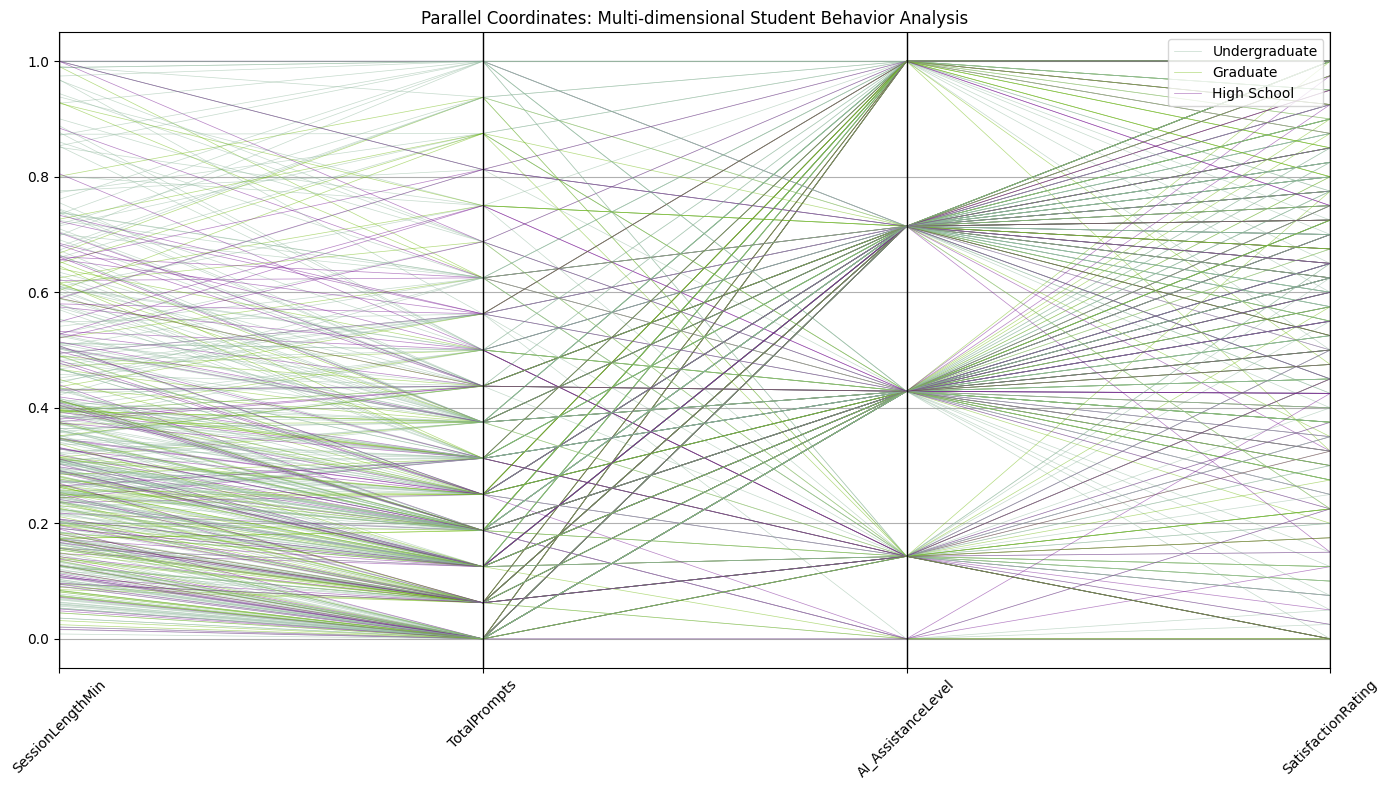

In [32]:
plt.figure(figsize=(14, 8))

# Select numeric columns and add categorical for coloring
plot_data = df[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating', 'StudentLevel']].copy()

# Normalize numeric columns for better visualization
numeric_cols = ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']
for col in numeric_cols:
    plot_data[col] = (plot_data[col] - plot_data[col].min()) / (plot_data[col].max() - plot_data[col].min())

# Sample data for cleaner visualization
sample_data = plot_data.sample(n=500, random_state=42)

parallel_coordinates(sample_data, 'StudentLevel', alpha=0.5, linewidth=0.5)
plt.title('Parallel Coordinates: Multi-dimensional Student Behavior Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Graduate students show more varied patterns across dimensions, while high school students display more consistent behavior in session characteristics.

#### Temporal Usage Patterns

<Figure size 1400x800 with 0 Axes>

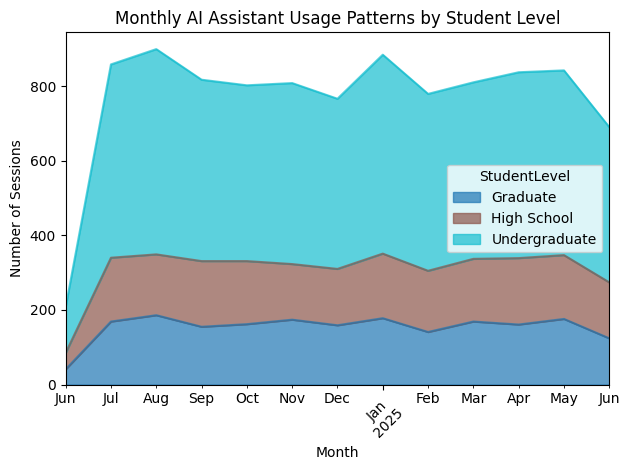

In [33]:
plt.figure(figsize=(14, 8))
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df['Month'] = df['SessionDate'].dt.to_period('M')

monthly_usage = df.groupby(['Month', 'StudentLevel']).size().unstack(fill_value=0)
monthly_usage.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10')
plt.title('Monthly AI Assistant Usage Patterns by Student Level')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Usage peaks during academic months with undergraduate students maintaining consistent high usage, while graduate usage shows more seasonal variation patterns.

#### Session Efficiency Analysis

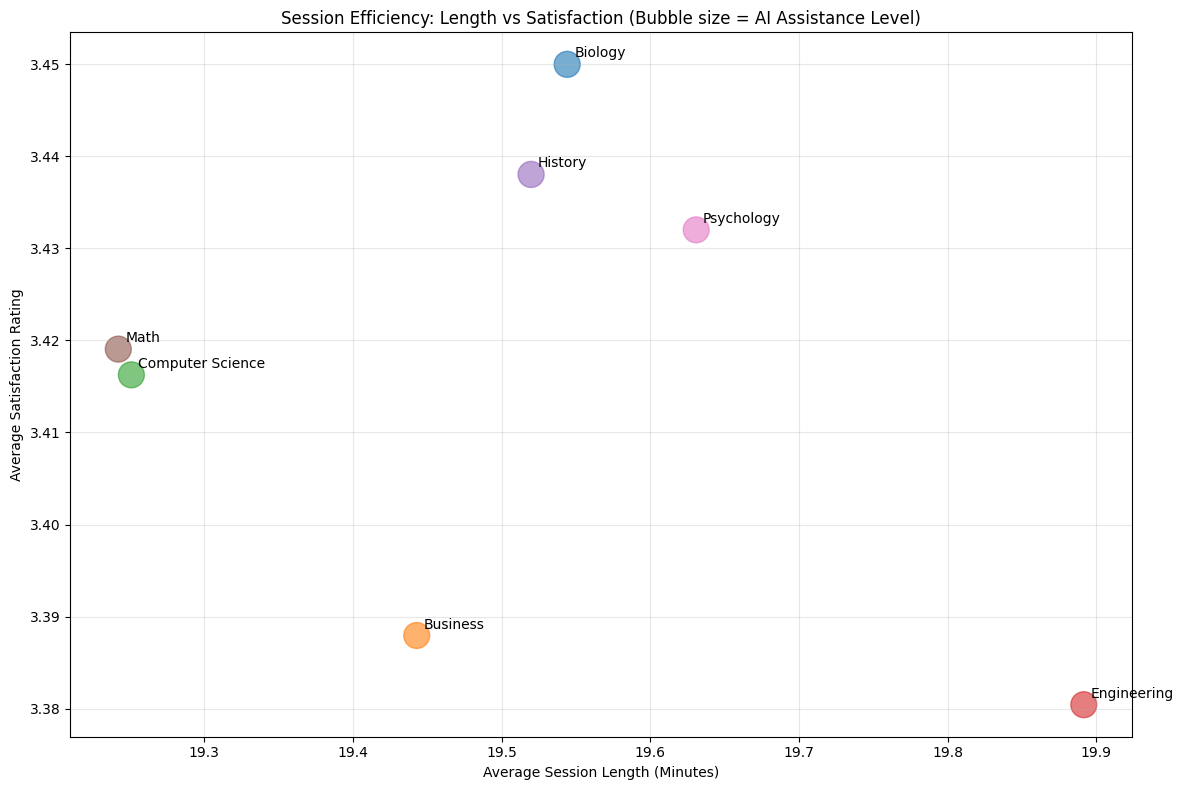

In [34]:
plt.figure(figsize=(12, 8))
discipline_stats = df.groupby('Discipline').agg({
    'SessionLengthMin': 'mean',
    'SatisfactionRating': 'mean',
    'AI_AssistanceLevel': 'mean'
}).reset_index()

colors = plt.cm.tab10(range(len(discipline_stats)))
plt.scatter(discipline_stats['SessionLengthMin'], discipline_stats['SatisfactionRating'], 
           s=discipline_stats['AI_AssistanceLevel']*100, c=colors, alpha=0.6)

for i, txt in enumerate(discipline_stats['Discipline']):
    plt.annotate(txt, (discipline_stats['SessionLengthMin'].iloc[i], 
                      discipline_stats['SatisfactionRating'].iloc[i]), 
                 xytext=(5, 5), textcoords='offset points')

plt.title('Session Efficiency: Length vs Satisfaction (Bubble size = AI Assistance Level)')
plt.xlabel('Average Session Length (Minutes)')
plt.ylabel('Average Satisfaction Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Psychology achieves high satisfaction with moderate session lengths, while Math requires longer sessions for similar satisfaction, indicating discipline-specific complexity differences.

## Conclusion

### Executive Summary

The analysis of 10,000 student AI assistant usage sessions reveals a transformative impact on educational practices across all academic levels. The data demonstrates widespread adoption with **47.68% of sessions resulting in completed assignments** and an impressive **70.64% user retention rate**, indicating both effectiveness and student satisfaction with AI-assisted learning.

### Key Findings

#### 1. Demographic Patterns and Usage Distribution

- **Undergraduate dominance**: 59.78% of all sessions, representing the largest user segment
- **Balanced disciplinary engagement**: Biology leads slightly at 14.58%, but all seven disciplines show remarkably consistent usage (14.15% - 14.58%)
- **Academic level progression**: Usage decreases with advancing education level (High School: 27.07%, Graduate: 13.15%), suggesting either different needs or varying institutional policies

#### 2. Task-Specific Utilization

- **Writing tasks dominate**: 31.01% of all sessions focus on writing assistance
- **Diverse academic support**: Six distinct task types demonstrate AI's versatility in educational contexts
- **High completion rates**: Writing, studying, and homework help show the strongest success patterns
- **Specialized needs**: Coding (16.39%) and research (8.42%) represent emerging AI applications in education

#### 3. Effectiveness Metrics

- **Assignment completion**: 47.68% success rate indicates substantial educational value
- **Idea generation**: 29.36% of sessions result in drafted concepts, supporting creative processes
- **Low abandonment**: Only 8.30% of users give up, suggesting appropriate difficulty matching
- **Moderate confusion**: 14.66% confusion rate indicates room for AI improvement

#### 4. Engagement Quality

- **Session duration**: Average 19.85 minutes suggests meaningful interaction depth
- **Interaction intensity**: 5.6 prompts per session on average indicates iterative problem-solving
- **AI assistance correlation**: Higher assistance levels (average 3.48/5) correlate with better outcomes
- **Satisfaction alignment**: Average 3.42/5 satisfaction rating reflects moderate user contentment

### Implications for Educational Technology

#### Positive Outcomes

1. **Accessibility**: AI assistants provide 24/7 academic support across all disciplines
2. **Scalability**: Consistent usage patterns suggest broad applicability regardless of subject matter
3. **Learning enhancement**: High completion rates indicate genuine educational value addition
4. **Skill development**: Writing task dominance suggests AI supports critical academic competencies

#### Areas for Improvement

1. **User experience optimization**: 14.66% confusion rate suggests interface or interaction design improvements needed
2. **Advanced user support**: Graduate student usage patterns indicate potential for more sophisticated AI capabilities
3. **Outcome prediction**: Understanding factors leading to the 8.30% abandonment rate could improve retention

### Behavioral Insights

#### Cross-Disciplinary Patterns

- **Universal appeal**: Nearly identical usage across Biology, Computer Science, Business, Engineering, Psychology, History, and Math
- **Consistent satisfaction**: Similar rating patterns across all academic fields
- **Stable engagement**: Session lengths and interaction patterns remain consistent regardless of subject

#### Educational Level Differentiation

- **Undergraduate optimization**: Highest usage and satisfaction rates suggest AI tools are well-suited for this demographic
- **Graduate complexity**: Longer sessions with higher variance suggest more complex problem-solving needs
- **High school adaptation**: Shorter, more focused sessions indicate different learning approaches

### Future Recommendations

#### For Educational Institutions

1. **Integration strategy**: Develop comprehensive AI literacy programs across all academic levels
2. **Policy development**: Create guidelines for appropriate AI assistance in academic work
3. **Resource allocation**: Invest in AI tools that support writing and homework assistance priorities

#### For AI Development

1. **Specialized interfaces**: Design different interaction patterns for various academic levels
2. **Subject-specific optimization**: While usage is consistent, subject-specific features could enhance effectiveness
3. **Outcome prediction**: Develop algorithms to identify and prevent session abandonment

#### For Students

1. **Strategic usage**: Leverage AI primarily for writing assistance and homework help where success rates are highest
2. **Iterative interaction**: Engage in multiple prompt cycles (average 5.6) for optimal results
3. **Realistic expectations**: Understand that AI assistance works best as a collaborative tool, not a replacement for learning

### Long-term Educational Impact

The data suggests AI assistants are becoming integral to modern education, with potential implications for:

- **Learning methodologies**: Shift toward AI-augmented problem-solving approaches
- **Assessment practices**: Need for new evaluation methods that account for AI collaboration
- **Digital literacy**: Essential skills for future workforce preparation
- **Educational equity**: Potential to democratize access to personalized academic support

### Final Thoughts

This comprehensive analysis reveals that AI assistants have successfully integrated into student academic workflows, providing substantial value across all educational levels and disciplines. The high completion rates, strong retention, and consistent cross-disciplinary usage indicate that AI-assisted learning is not just a technological novelty but a fundamental shift in educational practice.

The data supports continued investment in and development of AI educational tools, with particular attention to improving user experience and developing more sophisticated capabilities for advanced learners. As AI technology continues to evolve, its role in education will likely expand, making digital literacy and appropriate AI usage essential skills for academic success.

The balanced usage across disciplines, combined with high effectiveness metrics, suggests that AI assistants are fulfilling their promise as universal educational support tools, democratizing access to personalized academic assistance and potentially transforming how students approach learning in the digital age.
